In [1]:
# path to data
path = "/media/petbau/data/waymo/v0.9/"

In [14]:
import json

# DEPRECTATED -> Only needed for versions prior to v0.3
# folders = ['training', 'validation']

# info = {}
# for folder in folders:
#     with open(path + folder + "/info.json") as json_file:
#         data = json.load(json_file)
#         info[folder] = data


# for elm in info:
#     counter_2d += info[elm]['counter_2d']
#     counter_3d += info[elm]['counter_3d']
#     counter_3d_2d += info[elm]['counter_3d_2d']



with open(path + "/info.json") as json_file:
    info = json.load(json_file)


counter_2d = info["counter_2d"]
counter_3d = info["counter_3d"]
counter_3d_2d =  info["counter_3d_2d"]

print(f'Total pure 2D labels: {counter_2d}')
print(f'Total pure 3D labels: {counter_3d}')
print(f'Total 3D labels with 2D association: {counter_3d_2d}')  
print("")
print(f'Total 2D labels: {counter_2d + counter_3d_2d}')
print(f'Total 3D labels: {counter_3d + counter_3d_2d}') 


Total pure 2D labels: 166688
Total pure 3D labels: 5009
Total 3D labels with 2D association: 5560

Total 2D labels: 172248
Total 3D labels: 10569
177257
177257


# Joint Statistics

In [3]:
files_list = []
# get all pickle files
import os
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".pkl"):
            files_list.append(os.path.join(root, file))
            print(os.path.join(root, file))

/media/petbau/data/waymo/v0.9/3D/labels.pkl
/media/petbau/data/waymo/v0.9/2D/labels.pkl
/media/petbau/data/waymo/v0.9/3D_2D/labels.pkl


In [4]:
import pickle

keypoints = {}
for elm in files_list:
    data = pickle.load(open(elm, "rb"))
    keypoints.update(data)

In [5]:
def map_joint_number_to_name(joint_nr):
    if joint_nr == 0:
        return "UNSPECIFIED"
    if joint_nr == 1:
        return "NOSE"
    if joint_nr == 5:
        return "LEFT_SHOULDER"
    if joint_nr == 6:
        return "LEFT_ELBOW"
    if joint_nr == 7:
        return "LEFT_WRIST"
    if joint_nr == 8:
        return "LEFT_HIP"
    if joint_nr == 9:
        return "LEFT_KNEE"
    if joint_nr == 10:
        return "LEFT_ANKLE"
    if joint_nr == 13:
        return "RIGHT_SHOULDER"
    if joint_nr == 14:
        return "RIGHT_ELBOW"
    if joint_nr == 15:
        return "RIGHT_WRIST"
    if joint_nr == 16:
        return "RIGHT_HIP"
    if joint_nr == 17:
        return "RIGHT_KNEE"
    if joint_nr == 18:
        return "RIGHT_ANKLE"
    if joint_nr == 19:
        return "FOREHEAD"
    if joint_nr == 20:
        return "HEAD_CENTER"

def get_joints_dict():
    joints_dict ={
        "UNSPECIFIED ":0,
        "NOSE":0,
        "LEFT_SHOULDER":0,
        "LEFT_ELBOW":0,
        "LEFT_WRIST":0,
        "LEFT_HIP":0,
        "LEFT_KNEE":0,
        "LEFT_ANKLE":0,
        "RIGHT_SHOULDER":0,
        "RIGHT_ELBOW":0,
        "RIGHT_WRIST":0,
        "RIGHT_HIP":0,
        "RIGHT_KNEE":0,
        "RIGHT_ANKLE":0,
        "FOREHEAD":0,
        "HEAD_CENTER":0   
    }  
    return joints_dict

In [6]:
joints_3d_dict = get_joints_dict()
# joints_2d_dict_cond_3d = get_joints_dict()
joints_2d_dict = get_joints_dict()
joints_3d_with_corr_2d_dict = get_joints_dict()
total_number_only_2d_keypoints = 0
total_number_2d_keypoints = 0
total_number_3d_keypoints = 0
# total_number_2d_keypoints_cond_3d = 0
total_number_with_corr_2d = 0


joints_labeled_2d = []
joints_labeled_3d = []


for walker_name, walker_stats in keypoints.items():
    # all 2d keypoints
    if walker_stats.get('keypoints_2d'):
        total_number_2d_keypoints += 1
        if not walker_stats.get('keypoints_3d'):
            total_number_only_2d_keypoints += 1
        for joint_2d in walker_stats.get('keypoints_2d'):
            joints_2d_dict[map_joint_number_to_name(joint_2d)] += 1
        joints_labeled_2d.append(len(walker_stats.get('keypoints_2d')))
        
    
    # all 3d keypoints
    if walker_stats.get('keypoints_3d'):
        total_number_3d_keypoints += 1
        if  walker_stats.get('keypoints_2d'):
            total_number_with_corr_2d += 1

        for joint_3d in walker_stats.get('keypoints_3d'):
            joints_3d_dict[map_joint_number_to_name(joint_3d)] += 1

            # check if corresponding 2D keypoint is available
            if walker_stats.get('keypoints_2d'):
                if walker_stats['keypoints_2d'].get(joint_3d):
                    joints_3d_with_corr_2d_dict[map_joint_number_to_name(joint_3d)] += 1
         
        joints_labeled_3d.append(len(walker_stats.get('keypoints_3d')))
    
        # # 2d keypoint that also have 3d ones (although not the same)
        # if walker_stats.get('keypoints_2d'):
        #     total_number_2d_keypoints_cond_3d += 1
        #     for joint_2d in walker_stats.get('keypoints_2d'):
        #         joints_2d_dict_cond_3d[map_joint_number_to_name(joint_2d)] +=1

In [7]:
import statistics
print('2D Labels:')
print(f"    Median: {statistics.median(joints_labeled_2d)}")
print(f"    Mean: {statistics.mean(joints_labeled_2d)}")
print(f"    Stdev: {statistics.stdev(joints_labeled_2d)}")

print("3D Lables:")
print(f"    Median: {statistics.median(joints_labeled_3d)}")
print(f"    Mean: {statistics.mean(joints_labeled_3d)}")
print(f"    Stdev: {statistics.stdev(joints_labeled_3d)}")

2D Labels:
    Median: 9.0
    Mean: 8.6880892666388
    Stdev: 3.5541085438371542
3D Lables:
    Median: 13
    Mean: 13.341091872457186
    Stdev: 0.6738999643706691


In [8]:
# check if info files contain same information as loaded keypoints
only3d = total_number_3d_keypoints - total_number_with_corr_2d  
if (only3d != counter_3d ) or (total_number_with_corr_2d != counter_3d_2d):
    print("Length of loaded keypoints and info file does not match!")

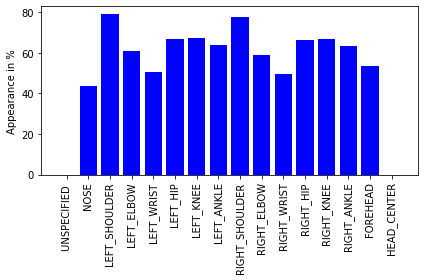

UNSPECIFIED : 0.0
NOSE: 43.443
LEFT_SHOULDER: 78.98
LEFT_ELBOW: 61.126
LEFT_WRIST: 50.637
LEFT_HIP: 66.952
LEFT_KNEE: 67.287
LEFT_ANKLE: 63.924
RIGHT_SHOULDER: 77.911
RIGHT_ELBOW: 58.801
RIGHT_WRIST: 49.505
RIGHT_HIP: 66.328
RIGHT_KNEE: 66.764
RIGHT_ANKLE: 63.419
FOREHEAD: 53.732
HEAD_CENTER: 0.0


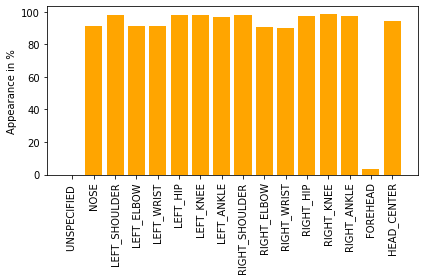

UNSPECIFIED : 0.0
NOSE: 91.456
LEFT_SHOULDER: 98.136
LEFT_ELBOW: 91.305
LEFT_WRIST: 91.087
LEFT_HIP: 97.739
LEFT_KNEE: 98.051
LEFT_ANKLE: 96.925
RIGHT_SHOULDER: 97.824
RIGHT_ELBOW: 90.472
RIGHT_WRIST: 90.236
RIGHT_HIP: 97.493
RIGHT_KNEE: 98.392
RIGHT_ANKLE: 97.18
FOREHEAD: 3.207
HEAD_CENTER: 94.607


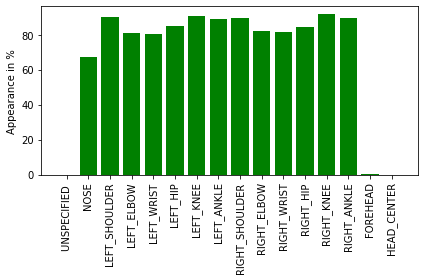

UNSPECIFIED : 0.0
NOSE: 67.05
LEFT_SHOULDER: 90.036
LEFT_ELBOW: 80.971
LEFT_WRIST: 80.54
LEFT_HIP: 85.018
LEFT_KNEE: 90.971
LEFT_ANKLE: 89.245
RIGHT_SHOULDER: 89.802
RIGHT_ELBOW: 82.41
RIGHT_WRIST: 81.673
RIGHT_HIP: 84.694
RIGHT_KNEE: 91.619
RIGHT_ANKLE: 89.838
FOREHEAD: 0.342
HEAD_CENTER: 0.0


<Figure size 432x288 with 0 Axes>

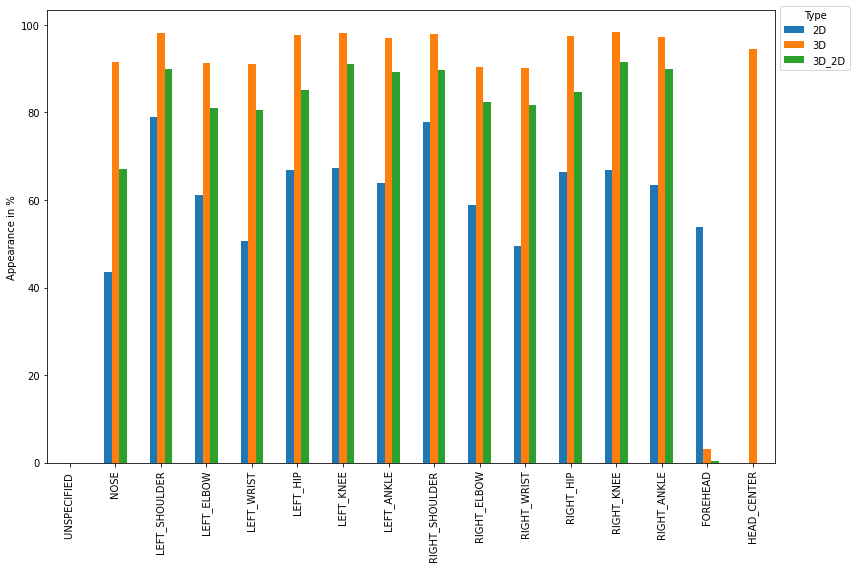

In [9]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


names = list(get_joints_dict().keys())

plt.rcParams['figure.dpi'] = 1000
plt.rcParams['savefig.dpi'] = 1000


values_2d = list(joints_2d_dict.values())
percent_values_2d = [value/total_number_2d_keypoints*100 for value in values_2d]
plt.bar(range(len(joints_2d_dict)), percent_values_2d, tick_label=names, color='blue')
plt.ylabel("Appearance in %")
plt.xticks(rotation=90)
#plt.title("2D Single Joint Appearance")
plt.savefig("pictures/single_joint_appearance_2d.pdf")
plt.show()
plt.close()

# print stats
for name, percent_value_2d  in zip(names, percent_values_2d):
    print(f"{name}: {round(percent_value_2d, 3)}")



values_3d = list(joints_3d_dict.values())
percent_values_3d = [value/total_number_3d_keypoints*100 for value in values_3d]
plt.bar(range(len(joints_3d_dict)), percent_values_3d, tick_label=names, color='orange')
plt.ylabel("Appearance in %")
plt.xticks(rotation=90)
#plt.title("3D Single Joint Appearance")
plt.savefig("pictures/single_joint_appearance_3d.pdf")
plt.show()
plt.close()

# print stats
for name, percent_value_3d  in zip(names, percent_values_3d):
    print(f"{name}: {round(percent_value_3d, 3)}")




values_2d_cond_3d = list(joints_3d_with_corr_2d_dict.values())
percent_values_2d_cond_3d = [value/total_number_with_corr_2d*100 for value in values_2d_cond_3d]
plt.bar(range(len(joints_3d_with_corr_2d_dict)), percent_values_2d_cond_3d, tick_label=names,  color='green')
plt.ylabel("Appearance in %")
plt.xticks(rotation=90)
#plt.title("2D Availability For Given 3D Point")
plt.savefig("pictures/2d_cond_3d.pdf")
plt.show()
plt.close()


# print stats
for name, percent_value_2d_cond_3d  in zip(names, percent_values_2d_cond_3d):
    print(f"{name}: {round(percent_value_2d_cond_3d, 3)}")



import pandas as pd
fig = plt.figure()
df = pd.DataFrame(data={"2D":percent_values_2d,"3D":percent_values_3d, "3D_2D":percent_values_2d_cond_3d}, index =names)
ax = df.plot(kind='bar', rot=90, ylabel='Appearance in %', figsize=(12, 8))
ax.legend(title='Type', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.xticks(rotation=90)
plt.savefig("pictures/all.png")
plt.show()


# LiDAR Point Cloud Statistics

In [10]:
import numpy as np

# load numpy files that store the information
files_list = []
# get all npy files
import os
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".npy"):
            files_list.append(os.path.join(root, file))
            # print(os.path.join(root, file))

arr_dict = {}
print("Key to flie relations:")
for index, file in enumerate(files_list):
    print(f"{index} -> {file}")
    arr = np.load(file)
    arr_dict[index] = arr

Key to flie relations:
0 -> /media/petbau/data/waymo/v0.9/3D/lidar_point_stats.npy
1 -> /media/petbau/data/waymo/v0.9/2D/lidar_point_stats.npy
2 -> /media/petbau/data/waymo/v0.9/3D_2D/lidar_point_stats.npy


In [11]:
# get stats across different categories
# for elm in list(arr_dict.values()):
#     print(elm)
#     print(elm.shape)

all_numbers = np.hstack(list(arr_dict.values()))

In [12]:
print(f"Median: {statistics.median(all_numbers)}")
print(f"Mean: {statistics.mean(all_numbers)}")


Median: 110
Mean: 202


Total number of samples: 177257
Samples with less than 10 LiDAR points: 4869 => 2.75%
Samples with less than 20 LiDAR points: 15475 => 8.73%
Samples with less than 30 LiDAR points: 27259 => 15.38%
Samples with less than 40 LiDAR points: 38254 => 21.58%
Samples with less than 50 LiDAR points: 48146 => 27.16%
Samples with less than 75 LiDAR points: 68384 => 38.58%
Samples with less than 100 LiDAR points: 83480 => 47.1%
Samples with less than 200 LiDAR points: 119236 => 67.27%
Samples with less than 250 LiDAR points: 130703 => 73.74%
Samples with less than 300 LiDAR points: 139242 => 78.55%
Samples with less than 400 LiDAR points: 151576 => 85.51%
Samples with less than 500 LiDAR points: 159355 => 89.9%
Samples with less than 750 LiDAR points: 169151 => 95.43%
Samples with less than 1000 LiDAR points: 173980 => 98.15%
Samples with less than 1500 LiDAR points: 176837 => 99.76%
Samples with less than 2000 LiDAR points: 177155 => 99.94%


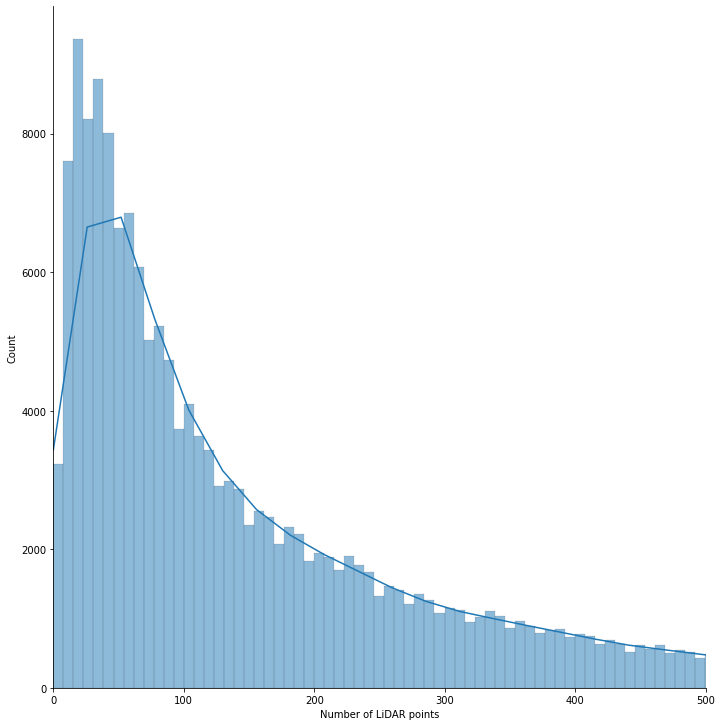

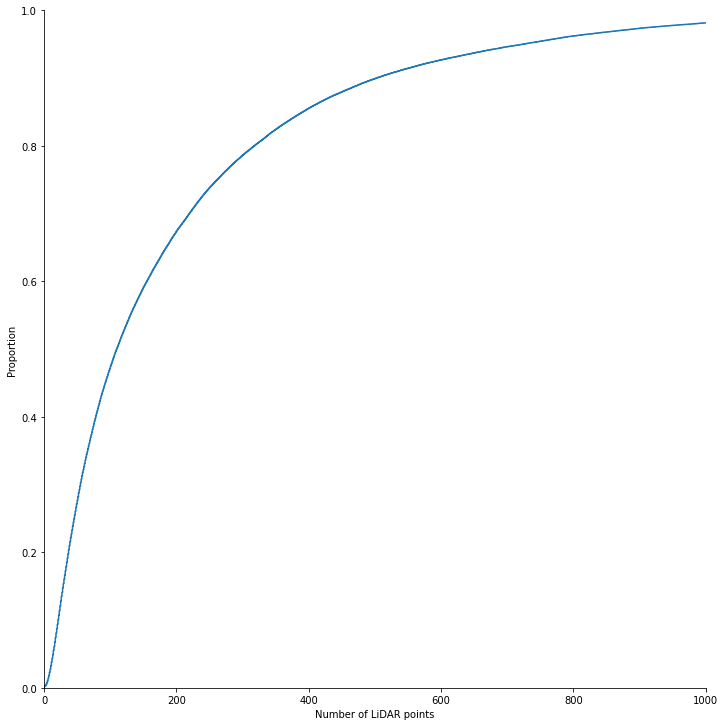

In [13]:
import seaborn as sns

print(f"Total number of samples: {len(all_numbers)}")
for i in [10, 20, 30, 40, 50, 75, 100, 200, 250, 300, 400, 500, 750, 1000, 1500, 2000]:
    smaller =  np.where(all_numbers < i, 1, 0).sum()
    print(f"Samples with less than {i} LiDAR points: {smaller} => {round(smaller/len(all_numbers)*100,2)}%")
    

kde_plot = sns.displot(all_numbers, kde=True, height=10, aspect=1)
plt.xlim(0, 500)
kde_plot.set_axis_labels("Number of LiDAR points")
ecdf_plot = sns.displot(all_numbers, kind="ecdf", height=10)
plt.xlim(0, 1000)
ecdf_plot.set_axis_labels("Number of LiDAR points")